In [ ]:
import pandas
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.spatial


module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
model = hub.load(module_url)
print ("module %s loaded" % module_url)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [ ]:


def processText(column,n):#to remove stop words,to convert into lowercase and root word
    import re

    corpus = []
    for i in range(n):
        # review = re.sub('[^a-zA-Z]', ' ', column[i])
        review = re.sub(r'\[[0-9]*\]',' ',column[i])
        review = re.sub(r'\s+',' ',review)
        review = review.lower()
        text = re.sub(r'\d',' ',review)
        review = re.sub(r'\s+',' ',review)

        # review = review.lower()
        review = review.split()
        ps = PorterStemmer()
        all_stopwords = stopwords.words('english')
        all_stopwords.remove('not')
        review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
        review = ' '.join(review)
        corpus.append(review)
    return corpus


In [ ]:
def embed(input):
  return model(input)

In [ ]:


df = pandas.read_csv('./'+'MSFT_combine.csv')


df=df.dropna()
df = df[~(df['datetime'] >= '2023-01-01')]#dropping rows of year=2023

df=df.reset_index(drop=True)


print(df.columns)

titleColumn=df['title']
summaryColumn=df['summary']
dateColumn=df['datetime']
titleColumn=list(titleColumn)
summaryColumn=list(summaryColumn)

corpus=processText(titleColumn,len(titleColumn))#preprocessing title column
df['title']=corpus

summaryCorpus=processText(summaryColumn,len(summaryColumn))#preprocessing summary column
df['summary']=summaryCorpus


df = df.astype({'title':'string'})
df = df.astype({'summary':'string'})

print(df.tail(5))

Index(['datetime', 'close', 'open', 'low', 'high', 'volume', 'y_actual', 'evm',
       'force_index', 'rsi', 'cci', 'macd-signal', 'atr', 'vwap', 'stx_7_3',
       'Total Revenue', 'Cost of Revenue', 'Gross Profit', 'Normalized EBITDA',
       'Operating Cash Flow', 'Investing Cash Flow', 'Financing Cash Flow',
       'Free Cash Flow', 'Total Assets',
       'Total Liabilities Net Minority Interest',
       'Total Equity Gross Minority Interest', 'Total Capitalization',
       'summary', 'title'],
      dtype='object')
       datetime       close        open         low        high      volume  \
969  2022-12-22  237.594894  241.259995  233.869995  241.990005  28651700.0   
970  2022-12-23  238.133545  236.110001  233.940002  238.869995  21207000.0   
971  2022-12-27  236.367981  238.699997  235.830002  238.929993  16688600.0   
972  2022-12-28  233.944031  236.889999  234.169998  239.720001  17457100.0   
973  2022-12-29  240.407837  235.649994  235.649994  241.919998  19770700.0   



In [ ]:
df.shape

(974, 29)

In [ ]:
titleColumn=df['title']
titleColumn[0]

# df=df.fillna(0)

# df=df.dropna()

'[\'author demand social network india scan pictur ... - mspoweruser\', \'microsoft surfac laptop 2 review: once-great laptop ... - pcworld\', \'cabinet approv set microsoft global data centr qatar - peninsula\', \'xbox live down: server statu latest microsoft confirm 0x87dd0006 sign issu - express\', \'myanalyt avail offic 365 microsoft 365 suit - neowin\', \'microsoft get approv open data center qatar - mspoweruser\', \'microsoft quietli updat window mix realiti ui ... - mspoweruser\', \'multipl microsoft patent point xbox one control improv - windowslatest\', \'microsoft graph: everyth develop need know - techgenix\', \'microsoft announc two new microsoft 365 secur ... - mspoweruser\', \'how creat form microsoft form adjust set - thewindowsclub\', "qatar\' cabinet approv microsoft azur data center - datacenterdynamics", \'which compani best code qualiti google, apple, microsoft amazon? - forbes\', \'how microsoft ceo satya nadella led company’ biggest turnaround 2018 - financi expre

In [ ]:
summaryColumn=df['summary']
summaryColumn[0]

'[\'we put us$349.99/£329.99 surfac headphon test hands-on review.\\nent surfac headphones, microsoft announc surfac event last october.\\nnonetheless, surfac headphon feel pleasantli light, mostli plastic design help feel comfort worn.\\nth headphon current avail surfac gray, product manag event would say anyth whether microsoft plan releas surfac headphon colours.\\nhowever, refer surfac devices, also avail colour mention headphon black, help surfac headphon stand out.\', \'paradox microsoft team offer all-in-on mod solut across pc xbox one.\\nparadox interact microsoft announc surpris new joint project today, titl paradox mods.\\nbil “the first-ev open mod platform enabl distribut user-cr game modif (mods) across multipl platforms”, paradox mod free offer xbox one pc.\\nto get thing rolling, paradox mod alreadi avail part free updat paradox interactive’ survival-strategi game surviv mars.\\nparadox mod support come game later time.\', \'thi isn\\\'t first time player abl add modifi 

In [ ]:
df.head(5)

,datetime,close,open,low,high,volume,y_actual,evm,force_index,rsi,...,Operating Cash Flow,Investing Cash Flow,Financing Cash Flow,Free Cash Flow,Total Assets,Total Liabilities Net Minority Interest,Total Equity Gross Minority Interest,Total Capitalization,summary,title
0,2019-02-20,102.832375,107.860001,106.290001,107.940002,21607700.0,1.0,0.898049,2.534889e+07,57.981282,...,52185000.0,-15773000.0,-36887000.0,38260000.0,286556000.0,184226000.0,102330000.0,168992000.0,['we put us$349.99/£329.99 surfac headphon tes...,['author demand social network india scan pict...
1,2019-02-21,105.001297,106.900002,106.870003,109.480003,29063200.0,1.0,1.880497,1.512891e+08,63.482724,...,52185000.0,-15773000.0,-36887000.0,38260000.0,286556000.0,184226000.0,102330000.0,168992000.0,['seattl seahawk star russel wilson alreadi ea...,['microsoft co-found paul allen taught nfl sta...
2,2019-02-22,106.498444,110.050003,109.820000,111.199997,27763200.0,1.0,3.052486,2.298640e+08,66.721646,...,52185000.0,-15773000.0,-36887000.0,38260000.0,286556000.0,184226000.0,102330000.0,168992000.0,['do idea insert tabl contents(toc) microsoft ...,['easi way insert tabl content refer microsoft...
3,2019-02-25,107.093452,111.760002,111.260002,112.180000,23750600.0,1.0,2.654672,1.435915e+08,67.938747,...,52185000.0,-15773000.0,-36887000.0,38260000.0,286556000.0,184226000.0,102330000.0,168992000.0,['microsoft introduc help featur microsoft to-...,['microsoft add calendar categori color latest...
4,2019-02-26,107.832413,111.260002,111.169998,113.239998,21536700.0,0.0,2.189771,1.156615e+08,69.433904,...,52185000.0,-15773000.0,-36887000.0,38260000.0,286556000.0,184226000.0,102330000.0,168992000.0,"['build work launch client microsoft, tripism\...","['microsoft, tripism pioneer account-specif su..."


In [ ]:
df.tail(5)

,datetime,close,open,low,high,volume,y_actual,evm,force_index,rsi,...,Operating Cash Flow,Investing Cash Flow,Financing Cash Flow,Free Cash Flow,Total Assets,Total Liabilities Net Minority Interest,Total Equity Gross Minority Interest,Total Capitalization,summary,title
969,2022-12-22,237.594894,241.259995,233.869995,241.990005,28651700.0,1.0,-20.631162,-4.810033e+08,43.552560,...,89035000.0,-30311000.0,-58876000.0,65149000.0,364840000.0,198298000.0,166542000.0,213574000.0,"[""through jan 2., save popular pc game like fl...",['microsoft store game deals: save 60% elden r...
970,2022-12-23,238.133545,236.110001,233.940002,238.869995,21207000.0,0.0,-19.766353,-2.426366e+08,44.140512,...,89035000.0,-30311000.0,-58876000.0,65149000.0,364840000.0,198298000.0,166542000.0,213574000.0,['microsoft introduc new type meet microsoft t...,['new meet style come microsoft team - uc toda...
971,2022-12-27,236.367981,238.699997,235.830002,238.929993,16688600.0,0.0,-10.456715,-1.358383e+08,42.575151,...,89035000.0,-30311000.0,-58876000.0,65149000.0,364840000.0,198298000.0,166542000.0,213574000.0,['“there’ career cybersecur everyon truli foun...,"['oops, microsoft accident reveal window 12 ne..."
972,2022-12-28,233.944031,236.889999,234.169998,239.720001,17457100.0,1.0,-6.437158,-1.713487e+08,40.454037,...,89035000.0,-30311000.0,-58876000.0,65149000.0,364840000.0,198298000.0,166542000.0,213574000.0,"[""advertisementa decad technolog abund end yea...","['big tech predict 2023: twitter, google, micr..."
973,2022-12-29,240.407837,235.649994,235.649994,241.919998,19770700.0,0.0,-5.346243,-1.260192e+08,47.907113,...,89035000.0,-30311000.0,-58876000.0,65149000.0,364840000.0,198298000.0,166542000.0,213574000.0,['microsoft prepar sever big featur updat wind...,['microsoft plan deliv sever window 11 2023 up...


In [ ]:
df.columns

Index(['datetime', 'close', 'open', 'low', 'high', 'volume', 'y_actual', 'evm',
       'force_index', 'rsi', 'cci', 'macd-signal', 'atr', 'vwap', 'stx_7_3',
       'Total Revenue', 'Cost of Revenue', 'Gross Profit', 'Normalized EBITDA',
       'Operating Cash Flow', 'Investing Cash Flow', 'Financing Cash Flow',
       'Free Cash Flow', 'Total Assets',
       'Total Liabilities Net Minority Interest',
       'Total Equity Gross Minority Interest', 'Total Capitalization',
       'summary', 'title'],
      dtype='object')

In [ ]:
df['y_actual']

0      1.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
969    1.0
970    0.0
971    0.0
972    1.0
973    0.0
Name: y_actual, Length: 974, dtype: float64

In [ ]:
y=df['y_actual']
# y=np.array(y)
y

0      1.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
969    1.0
970    0.0
971    0.0
972    1.0
973    0.0
Name: y_actual, Length: 974, dtype: float64

In [ ]:
column_names=["y_actual"]

# Create DataFrame by assigning column names
y_df=pd.DataFrame(y, columns=column_names)

In [ ]:
y_df

,y_actual
0,1.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
969,1.0
970,0.0
971,0.0
972,1.0


In [ ]:
# headers = ['y_lables']
# y_df = pd.DataFrame(y, columns=headers)
y_df['datetime']=df['datetime']

In [ ]:
y_df.head(5)

,y_actual,datetime
0,1.0,2019-02-20
1,1.0,2019-02-21
2,1.0,2019-02-22
3,1.0,2019-02-25
4,0.0,2019-02-26


In [ ]:
y_df.shape

(974, 2)

In [ ]:
y_df.tail(5)

,y_actual,datetime
969,1.0,2022-12-22
970,0.0,2022-12-23
971,0.0,2022-12-27
972,1.0,2022-12-28
973,0.0,2022-12-29


In [ ]:
# df_title=df[['datetime','title']]
df=df.drop(['datetime','title','summary','y_actual'],axis='columns')#dropping the date column


In [ ]:
from sklearn.preprocessing import MinMaxScaler
 
 
# scale features
scaler = MinMaxScaler()
# model=scaler.fit(df)
# scaled_data=model.transform(df)

scaled_data=scaler.fit_transform(df)
 
# print scaled features
df=scaled_data
# print(scaled_data)

In [ ]:
df=pd.DataFrame(df)
df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.000000,0.004038,0.000000,0.000000,0.143354,0.592786,0.712140,0.542931,0.660304,0.569380,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
1,0.009181,0.000000,0.002459,0.006371,0.228053,0.599654,0.736992,0.637608,0.766912,0.583657,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
2,0.015518,0.013251,0.014963,0.013486,0.213284,0.607847,0.752497,0.693349,0.898087,0.602614,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
3,0.018037,0.020444,0.021067,0.017540,0.167698,0.605066,0.735473,0.714294,0.874076,0.615645,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
4,0.021165,0.018341,0.020686,0.021925,0.142547,0.601816,0.729962,0.740025,0.819237,0.625507,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,0.570440,0.565203,0.540799,0.554544,0.223378,0.442286,0.612222,0.294620,0.317915,0.307356,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0
970,0.572720,0.543539,0.541096,0.541637,0.138802,0.448332,0.659259,0.304739,0.329265,0.291684,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0
971,0.565246,0.554434,0.549108,0.541886,0.087470,0.513411,0.680333,0.277800,0.366969,0.276699,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0
972,0.554986,0.546820,0.542071,0.545154,0.096200,0.541510,0.673326,0.241296,0.374807,0.257395,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0


In [ ]:
df.shape

(974, 25)

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:

def sentiment_scores(sentence):
        sid_obj=SentimentIntensityAnalyzer()

        sentiment_dict=sid_obj.polarity_scores(sentence)

        if sentiment_dict['compound']>=0.05:
            return 2
        elif sentiment_dict['compound']<=-0.05:
            return 0
        else:
            return 1
	 

In [ ]:
# from textblob import TextBlob

In [ ]:
titleSentiment=[]

In [ ]:
for content in titleColumn:

        score=sentiment_scores(content)
        titleSentiment.append(score)

In [ ]:
titleSentiment.count(2)

798

In [ ]:
titleSentiment.count(1)

18

In [ ]:
titleSentiment.count(0)

158

In [ ]:
summarySentiment=[]

In [ ]:
for content in summaryColumn:
     
        score=sentiment_scores(content)
        summarySentiment.append(score)

In [ ]:
summarySentiment.count(2)

960

In [ ]:
summarySentiment.count(1)

0

In [ ]:
summarySentiment.count(0)

14

In [ ]:
# for content in titleColumn:
#     blob = TextBlob(content)
#     sentiment=blob.sentiment.polarity
#     if sentiment<0:
#       titleSentiment.append(0)
#     else:
#       titleSentiment.append(1)

In [ ]:
# for content in summaryColumn:
#     blob = TextBlob(content)
#     sentiment=blob.sentiment.polarity
#     if sentiment<0:
#       summarySentiment.append(0)
#     else:
#       summarySentiment.append(1)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.000000,0.004038,0.000000,0.000000,0.143354,0.592786,0.712140,0.542931,0.660304,0.569380,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
1,0.009181,0.000000,0.002459,0.006371,0.228053,0.599654,0.736992,0.637608,0.766912,0.583657,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
2,0.015518,0.013251,0.014963,0.013486,0.213284,0.607847,0.752497,0.693349,0.898087,0.602614,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
3,0.018037,0.020444,0.021067,0.017540,0.167698,0.605066,0.735473,0.714294,0.874076,0.615645,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
4,0.021165,0.018341,0.020686,0.021925,0.142547,0.601816,0.729962,0.740025,0.819237,0.625507,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,0.570440,0.565203,0.540799,0.554544,0.223378,0.442286,0.612222,0.294620,0.317915,0.307356,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0
970,0.572720,0.543539,0.541096,0.541637,0.138802,0.448332,0.659259,0.304739,0.329265,0.291684,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0
971,0.565246,0.554434,0.549108,0.541886,0.087470,0.513411,0.680333,0.277800,0.366969,0.276699,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0
972,0.554986,0.546820,0.542071,0.545154,0.096200,0.541510,0.673326,0.241296,0.374807,0.257395,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0


In [ ]:

text_vector=[]# will contain vector representation of titleColumn
summary_vector=[]

In [ ]:
for text in titleColumn:
    sentence = text
    message_embeddings = embed([sentence])
    temp=np.array(message_embeddings[0])
    temp=temp.T
    text_vector.append(temp)


In [ ]:
for summary in summaryColumn:
    sentence = summary
    message_embeddings = embed([sentence])
    temp=np.array(message_embeddings[0])
    temp=temp.T
    summary_vector.append(temp)

In [ ]:
text_vector=np.array(text_vector)
summary_vector=np.array(summary_vector)

In [ ]:
text_vector.shape

(974, 512)

In [ ]:
type(text_vector)

numpy.ndarray

In [ ]:
summary_vector.shape

(974, 512)

In [ ]:
text_vector.shape

(974, 512)

In [ ]:
scaler = MinMaxScaler()
scaled_data_text=scaler.fit_transform(text_vector)
# scaled_data_text=model.transform(text_vector)
 
# print scaled features
# print(scaled_data)

In [ ]:
scaler = MinMaxScaler()
scaled_data_summary=scaler.fit_transform(summary_vector)
# scaled_data_summary=model.transform(summary_vector)
 
# print scaled features
# print(scaled_data)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.000000,0.004038,0.000000,0.000000,0.143354,0.592786,0.712140,0.542931,0.660304,0.569380,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
1,0.009181,0.000000,0.002459,0.006371,0.228053,0.599654,0.736992,0.637608,0.766912,0.583657,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
2,0.015518,0.013251,0.014963,0.013486,0.213284,0.607847,0.752497,0.693349,0.898087,0.602614,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
3,0.018037,0.020444,0.021067,0.017540,0.167698,0.605066,0.735473,0.714294,0.874076,0.615645,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
4,0.021165,0.018341,0.020686,0.021925,0.142547,0.601816,0.729962,0.740025,0.819237,0.625507,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,0.570440,0.565203,0.540799,0.554544,0.223378,0.442286,0.612222,0.294620,0.317915,0.307356,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0
970,0.572720,0.543539,0.541096,0.541637,0.138802,0.448332,0.659259,0.304739,0.329265,0.291684,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0
971,0.565246,0.554434,0.549108,0.541886,0.087470,0.513411,0.680333,0.277800,0.366969,0.276699,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0
972,0.554986,0.546820,0.542071,0.545154,0.096200,0.541510,0.673326,0.241296,0.374807,0.257395,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0


In [ ]:
pca = PCA(n_components = 30)
pca.fit(scaled_data_text)
data_pca_text = pca.transform(scaled_data_text)
data_pca_text

array([[ 4.252721  ,  3.019301  , -1.7161016 , ..., -1.106188  ,
        -0.337251  , -0.42116112],
       [-2.7435226 ,  0.75607735, -0.19264051, ...,  0.29456437,
        -0.38717523, -0.9498129 ],
       [-3.090663  ,  0.7811915 ,  0.28562284, ..., -0.2680791 ,
        -0.2645013 ,  0.5411136 ],
       ...,
       [ 0.62429756, -2.2354403 ,  0.6928103 , ...,  0.17220128,
        -0.42066634, -0.05708332],
       [-2.7868547 ,  1.1273855 ,  1.4057101 , ..., -0.06677222,
         0.20908438, -0.01131745],
       [-2.9168289 ,  0.5755662 , -0.540947  , ...,  0.52499413,
         0.19386807, -0.17964444]], dtype=float32)

In [ ]:
pca = PCA(n_components = 30)
pca.fit(scaled_data_summary)
data_pca_summary = pca.transform(scaled_data_summary)
data_pca_summary

array([[ 1.2860706 , -0.82253337, -0.1131706 , ...,  0.33387995,
         0.07387046,  0.20732607],
       [-0.48420465,  0.5139721 , -1.4596694 , ...,  0.7248869 ,
         0.02041692, -0.24306475],
       [-0.36539257,  0.17876643, -0.70552003, ..., -0.23601377,
        -0.0992393 , -0.27306265],
       ...,
       [-0.72030044, -0.76901245,  1.4672391 , ..., -0.46284056,
         0.4304032 ,  0.02200985],
       [ 5.493051  ,  4.5478144 ,  3.0824113 , ..., -0.51113886,
         0.76729506,  0.42761514],
       [-0.11724252, -1.3428637 ,  1.0186113 , ..., -0.4081127 ,
        -0.192687  ,  0.06884627]], dtype=float32)

In [ ]:
data_pca_text.shape

(974, 30)

In [ ]:
data_pca_summary.shape

(974, 30)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.000000,0.004038,0.000000,0.000000,0.143354,0.592786,0.712140,0.542931,0.660304,0.569380,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
1,0.009181,0.000000,0.002459,0.006371,0.228053,0.599654,0.736992,0.637608,0.766912,0.583657,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
2,0.015518,0.013251,0.014963,0.013486,0.213284,0.607847,0.752497,0.693349,0.898087,0.602614,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
3,0.018037,0.020444,0.021067,0.017540,0.167698,0.605066,0.735473,0.714294,0.874076,0.615645,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
4,0.021165,0.018341,0.020686,0.021925,0.142547,0.601816,0.729962,0.740025,0.819237,0.625507,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,0.570440,0.565203,0.540799,0.554544,0.223378,0.442286,0.612222,0.294620,0.317915,0.307356,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0
970,0.572720,0.543539,0.541096,0.541637,0.138802,0.448332,0.659259,0.304739,0.329265,0.291684,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0
971,0.565246,0.554434,0.549108,0.541886,0.087470,0.513411,0.680333,0.277800,0.366969,0.276699,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0
972,0.554986,0.546820,0.542071,0.545154,0.096200,0.541510,0.673326,0.241296,0.374807,0.257395,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0


In [ ]:
# text_vector_dataframe=pd.DataFrame()
type(data_pca_text)
# df_news  =pd.DataFrame(((x,) for x in data_pca), columns=['title'])
mycolumns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10','pca11','pca12','pca13','pca14','pca15','pca16','pca17','pca18','pca19','pca20','pca21','pca22','pca23','pca24','pca25','pca26','pca27','pca28','pca29','pca30']
df_news_text=pd.DataFrame(data_pca_text, columns = mycolumns)

In [ ]:
# text_vector_dataframe=pd.DataFrame()
type(data_pca_summary)
# df_news  =pd.DataFrame(((x,) for x in data_pca), columns=['title'])
mycolumns=['Spca1','Spca2','Spca3','Spca4','Spca5','Spca6','Spca7','Spca8','Spca9','Spca10','Spca11','Spca12','Spca13','Spca14','Spca15','Spca16','Spca17','Spca18','Spca19','Spca20','Spca21','Spca22','Spca23','Spca24','Spca25','Spca26','Spca27','Spca28','Spca29','Spca30']
df_news_summary=pd.DataFrame(data_pca_summary, columns = mycolumns)

In [ ]:
df_news_text

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29,pca30
0,4.252721,3.019301,-1.716102,-0.448839,1.218175,1.430554,1.230503,0.951399,-0.188278,-0.488622,...,-0.691932,0.038475,1.572777,-0.803625,-0.770692,1.632727,0.320983,-1.106188,-0.337251,-0.421161
1,-2.743523,0.756077,-0.192641,0.221477,-0.281978,1.071340,0.198724,0.467035,-0.594016,0.808710,...,0.283837,0.005344,0.199036,0.474273,-0.891310,0.323568,-0.059341,0.294564,-0.387175,-0.949813
2,-3.090663,0.781192,0.285623,-1.087592,0.119473,-0.519719,-0.640865,0.272269,0.171390,-0.265647,...,0.249201,-0.187368,0.233869,0.441160,0.101669,0.211413,0.055125,-0.268079,-0.264501,0.541114
3,0.488742,-2.079102,-0.445338,0.041538,0.470204,0.365255,0.955672,0.221412,-0.107311,0.090724,...,0.329091,0.134601,0.090153,0.392090,0.076070,0.105158,-0.106548,0.007374,-0.239546,-0.147987
4,-2.934766,1.019118,0.687278,-0.127151,-0.004026,0.453214,-0.575989,-0.097579,-0.672025,-0.188945,...,0.284839,-0.232827,-0.044334,-0.398210,-0.059093,0.336197,-0.504827,0.057239,0.063589,0.060991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,-0.670659,-0.771445,0.777610,-2.031512,0.930403,-0.094217,-0.415781,0.628528,0.125972,-1.055535,...,-0.874530,0.319182,0.184490,-1.205583,0.623454,0.041586,0.016833,0.105321,-0.908839,0.010957
970,-3.078051,1.098753,1.032862,-0.778178,0.051449,-0.323867,-0.132751,1.585096,0.189612,-0.097168,...,-0.260890,0.244290,0.201273,0.099387,0.803139,-0.763032,-0.265571,0.607393,-0.096930,0.136934
971,0.624298,-2.235440,0.692810,-0.769836,1.153710,0.842790,-0.063785,-0.198599,-0.754053,-0.190883,...,-0.394945,-0.130504,0.193483,-0.231725,-0.062869,0.085431,-0.201960,0.172201,-0.420666,-0.057083
972,-2.786855,1.127385,1.405710,0.864610,0.249449,1.391449,-0.451164,-0.205968,-0.668450,0.876608,...,-1.047041,-0.124008,-0.006422,0.137912,0.078899,0.251476,-0.157999,-0.066772,0.209084,-0.011317


In [ ]:
df_news_summary

,Spca1,Spca2,Spca3,Spca4,Spca5,Spca6,Spca7,Spca8,Spca9,Spca10,...,Spca21,Spca22,Spca23,Spca24,Spca25,Spca26,Spca27,Spca28,Spca29,Spca30
0,1.286071,-0.822533,-0.113171,1.280906,1.160499,-0.801602,0.689342,0.304012,-1.437607,0.316862,...,0.242029,-1.098593,-0.487267,-0.697554,0.055378,-0.527121,0.101487,0.333880,0.073870,0.207326
1,-0.484205,0.513972,-1.459669,-0.086563,1.489713,0.311030,-0.478305,0.191754,0.394603,-0.278448,...,-0.469036,0.112327,0.589770,-0.066448,-0.473683,0.039989,0.009696,0.724887,0.020417,-0.243065
2,-0.365393,0.178766,-0.705520,0.340071,1.221842,0.219806,-1.356143,-0.041418,0.039270,-0.081145,...,-0.680789,-0.262482,-0.353317,0.725598,0.628903,-0.228986,-0.385000,-0.236014,-0.099239,-0.273063
3,0.312703,-1.261405,0.001120,1.056486,1.350945,-0.485099,0.676520,-0.239128,-0.083322,1.119540,...,-0.349292,-0.394502,-0.140700,0.156272,-0.644932,0.343555,-0.008132,0.260180,-0.043555,-0.010140
4,1.015199,-1.420711,-0.266096,0.372007,0.885622,0.725770,0.074188,0.283583,0.071969,1.396630,...,-0.242878,-0.020054,0.227420,0.018259,-0.029916,0.007768,-0.045529,0.364134,0.160408,0.596865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,3.001027,-0.629263,-0.690659,0.995189,0.127099,1.019214,-0.877574,-1.077102,0.688537,0.436424,...,-0.458756,-0.035219,-0.513989,-0.077430,0.214277,-0.381410,-0.578312,0.595351,-0.456666,-0.368322
970,1.270644,-0.967896,-0.296017,1.403889,0.757675,0.437147,-0.785327,0.623668,0.785360,0.529679,...,-0.013567,0.132269,0.432483,-0.108721,-0.334742,0.422001,0.215107,0.006796,0.490948,0.145773
971,-0.720300,-0.769012,1.467239,0.199364,0.164374,1.176861,-0.838859,-0.366660,-0.005046,0.141081,...,0.412231,0.456981,-0.192599,0.267287,-0.225391,-0.204889,0.027251,-0.462841,0.430403,0.022010
972,5.493051,4.547814,3.082411,-1.776825,1.206324,-0.096070,1.490267,0.056679,1.029176,-1.360923,...,0.044010,-0.013774,-0.216611,-0.296264,1.065916,-0.377267,-0.442005,-0.511139,0.767295,0.427615


In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.000000,0.004038,0.000000,0.000000,0.143354,0.592786,0.712140,0.542931,0.660304,0.569380,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
1,0.009181,0.000000,0.002459,0.006371,0.228053,0.599654,0.736992,0.637608,0.766912,0.583657,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
2,0.015518,0.013251,0.014963,0.013486,0.213284,0.607847,0.752497,0.693349,0.898087,0.602614,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
3,0.018037,0.020444,0.021067,0.017540,0.167698,0.605066,0.735473,0.714294,0.874076,0.615645,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
4,0.021165,0.018341,0.020686,0.021925,0.142547,0.601816,0.729962,0.740025,0.819237,0.625507,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,0.570440,0.565203,0.540799,0.554544,0.223378,0.442286,0.612222,0.294620,0.317915,0.307356,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0
970,0.572720,0.543539,0.541096,0.541637,0.138802,0.448332,0.659259,0.304739,0.329265,0.291684,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0
971,0.565246,0.554434,0.549108,0.541886,0.087470,0.513411,0.680333,0.277800,0.366969,0.276699,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0
972,0.554986,0.546820,0.542071,0.545154,0.096200,0.541510,0.673326,0.241296,0.374807,0.257395,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0


In [ ]:
df.columns

RangeIndex(start=0, stop=25, step=1)

In [ ]:
df=np.array(df)

In [ ]:
column=['close', 'open', 'low', 'high', 'volume','evm',  'force_index', 'rsi', 'cci', 'macd-signal', 'atr', 'vwap', 'stx_7_3',
  'Total Revenue', 'Cost of Revenue', 'Gross Profit', 'Normalized EBITDA',  'Operating Cash Flow', 'Investing Cash Flow', 'Financing Cash Flow',
   'Free Cash Flow', 'Total Assets',  'Total Liabilities Net Minority Interest', 'Total Equity Gross Minority Interest', 'Total Capitalization']

df=pd.DataFrame(df,columns=column)
    #  'volume', 'y_actual', 'evm',
#    ,'titleSentiment','summarySentiment'

In [ ]:
df

,close,open,low,high,volume,evm,force_index,rsi,cci,macd-signal,...,Gross Profit,Normalized EBITDA,Operating Cash Flow,Investing Cash Flow,Financing Cash Flow,Free Cash Flow,Total Assets,Total Liabilities Net Minority Interest,Total Equity Gross Minority Interest,Total Capitalization
0,0.000000,0.004038,0.000000,0.000000,0.143354,0.592786,0.712140,0.542931,0.660304,0.569380,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
1,0.009181,0.000000,0.002459,0.006371,0.228053,0.599654,0.736992,0.637608,0.766912,0.583657,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
2,0.015518,0.013251,0.014963,0.013486,0.213284,0.607847,0.752497,0.693349,0.898087,0.602614,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
3,0.018037,0.020444,0.021067,0.017540,0.167698,0.605066,0.735473,0.714294,0.874076,0.615645,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
4,0.021165,0.018341,0.020686,0.021925,0.142547,0.601816,0.729962,0.740025,0.819237,0.625507,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,0.570440,0.565203,0.540799,0.554544,0.223378,0.442286,0.612222,0.294620,0.317915,0.307356,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0
970,0.572720,0.543539,0.541096,0.541637,0.138802,0.448332,0.659259,0.304739,0.329265,0.291684,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0
971,0.565246,0.554434,0.549108,0.541886,0.087470,0.513411,0.680333,0.277800,0.366969,0.276699,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0
972,0.554986,0.546820,0.542071,0.545154,0.096200,0.541510,0.673326,0.241296,0.374807,0.257395,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0


In [ ]:
df['titleSentiment']=titleSentiment

In [ ]:
df['summarySentiment']=summarySentiment

In [ ]:
# df=df.drop(['y_actual'],axis='columns')
df.columns

Index(['close', 'open', 'low', 'high', 'volume', 'evm', 'force_index', 'rsi',
       'cci', 'macd-signal', 'atr', 'vwap', 'stx_7_3', 'Total Revenue',
       'Cost of Revenue', 'Gross Profit', 'Normalized EBITDA',
       'Operating Cash Flow', 'Investing Cash Flow', 'Financing Cash Flow',
       'Free Cash Flow', 'Total Assets',
       'Total Liabilities Net Minority Interest',
       'Total Equity Gross Minority Interest', 'Total Capitalization',
       'titleSentiment', 'summarySentiment'],
      dtype='object')

In [ ]:
df.head(5)

,close,open,low,high,volume,evm,force_index,rsi,cci,macd-signal,...,Operating Cash Flow,Investing Cash Flow,Financing Cash Flow,Free Cash Flow,Total Assets,Total Liabilities Net Minority Interest,Total Equity Gross Minority Interest,Total Capitalization,titleSentiment,summarySentiment
0,0.000000,0.004038,0.000000,0.000000,0.143354,0.592786,0.712140,0.542931,0.660304,0.569380,...,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0,2,2
1,0.009181,0.000000,0.002459,0.006371,0.228053,0.599654,0.736992,0.637608,0.766912,0.583657,...,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0,2,2
2,0.015518,0.013251,0.014963,0.013486,0.213284,0.607847,0.752497,0.693349,0.898087,0.602614,...,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0,2,2
3,0.018037,0.020444,0.021067,0.017540,0.167698,0.605066,0.735473,0.714294,0.874076,0.615645,...,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0,2,2
4,0.021165,0.018341,0.020686,0.021925,0.142547,0.601816,0.729962,0.740025,0.819237,0.625507,...,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0,2,2


In [ ]:
newDF=pd.concat([dateColumn,df,df_news_text,df_news_summary],axis=1)


In [ ]:
newDF.shape

(974, 88)

In [ ]:
newDF.head(5)

,datetime,close,open,low,high,volume,evm,force_index,rsi,cci,...,Spca21,Spca22,Spca23,Spca24,Spca25,Spca26,Spca27,Spca28,Spca29,Spca30
0,2019-02-20,0.000000,0.004038,0.000000,0.000000,0.143354,0.592786,0.712140,0.542931,0.660304,...,0.242029,-1.098593,-0.487267,-0.697554,0.055378,-0.527121,0.101487,0.333880,0.073870,0.207326
1,2019-02-21,0.009181,0.000000,0.002459,0.006371,0.228053,0.599654,0.736992,0.637608,0.766912,...,-0.469036,0.112327,0.589770,-0.066448,-0.473683,0.039989,0.009696,0.724887,0.020417,-0.243065
2,2019-02-22,0.015518,0.013251,0.014963,0.013486,0.213284,0.607847,0.752497,0.693349,0.898087,...,-0.680789,-0.262482,-0.353317,0.725598,0.628903,-0.228986,-0.385000,-0.236014,-0.099239,-0.273063
3,2019-02-25,0.018037,0.020444,0.021067,0.017540,0.167698,0.605066,0.735473,0.714294,0.874076,...,-0.349292,-0.394502,-0.140700,0.156272,-0.644932,0.343555,-0.008132,0.260180,-0.043555,-0.010140
4,2019-02-26,0.021165,0.018341,0.020686,0.021925,0.142547,0.601816,0.729962,0.740025,0.819237,...,-0.242878,-0.020054,0.227420,0.018259,-0.029916,0.007768,-0.045529,0.364134,0.160408,0.596865


In [ ]:
newDF.columns

Index(['datetime', 'close', 'open', 'low', 'high', 'volume', 'evm',
       'force_index', 'rsi', 'cci', 'macd-signal', 'atr', 'vwap', 'stx_7_3',
       'Total Revenue', 'Cost of Revenue', 'Gross Profit', 'Normalized EBITDA',
       'Operating Cash Flow', 'Investing Cash Flow', 'Financing Cash Flow',
       'Free Cash Flow', 'Total Assets',
       'Total Liabilities Net Minority Interest',
       'Total Equity Gross Minority Interest', 'Total Capitalization',
       'titleSentiment', 'summarySentiment', 'pca1', 'pca2', 'pca3', 'pca4',
       'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12',
       'pca13', 'pca14', 'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20',
       'pca21', 'pca22', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28',
       'pca29', 'pca30', 'Spca1', 'Spca2', 'Spca3', 'Spca4', 'Spca5', 'Spca6',
       'Spca7', 'Spca8', 'Spca9', 'Spca10', 'Spca11', 'Spca12', 'Spca13',
       'Spca14', 'Spca15', 'Spca16', 'Spca17', 'Spca18', 'Spca19', 'Spca20'

Start applying model after this.

Take data before 2022-9-30 as training and after as testing.


In [ ]:
file_train = newDF[(newDF['datetime'] <'2022-01-01')]
file_test = newDF[(newDF['datetime'] >='2022-01-01')]
y_df_train = y_df[(y_df['datetime'] <'2022-01-01')]
y_df_test = y_df[(y_df['datetime'] >='2022-01-01')]
print("train x: ",file_train.shape,"train y: ",y_df_train.shape)
print("test x: ",file_test.shape,"test y: ",y_df_test.shape)



train x:  (724, 88) train y:  (724, 2)
test x:  (250, 88) test y:  (250, 2)


In [ ]:
file_train = file_train.drop('datetime', axis=1)
# file_train = file_train.drop('title', axis=1)
file_test = file_test.drop('datetime', axis=1)
y_df_train = y_df_train.drop('datetime', axis=1)
y_df_test = y_df_test.drop('datetime', axis=1)
file_train

,close,open,low,high,volume,evm,force_index,rsi,cci,macd-signal,...,Spca21,Spca22,Spca23,Spca24,Spca25,Spca26,Spca27,Spca28,Spca29,Spca30
0,0.000000,0.004038,0.000000,0.000000,0.143354,0.592786,0.712140,0.542931,0.660304,0.569380,...,0.242029,-1.098593,-0.487267,-0.697554,0.055378,-0.527121,0.101487,0.333880,0.073870,0.207326
1,0.009181,0.000000,0.002459,0.006371,0.228053,0.599654,0.736992,0.637608,0.766912,0.583657,...,-0.469036,0.112327,0.589770,-0.066448,-0.473683,0.039989,0.009696,0.724887,0.020417,-0.243065
2,0.015518,0.013251,0.014963,0.013486,0.213284,0.607847,0.752497,0.693349,0.898087,0.602614,...,-0.680789,-0.262482,-0.353317,0.725598,0.628903,-0.228986,-0.385000,-0.236014,-0.099239,-0.273063
3,0.018037,0.020444,0.021067,0.017540,0.167698,0.605066,0.735473,0.714294,0.874076,0.615645,...,-0.349292,-0.394502,-0.140700,0.156272,-0.644932,0.343555,-0.008132,0.260180,-0.043555,-0.010140
4,0.021165,0.018341,0.020686,0.021925,0.142547,0.601816,0.729962,0.740025,0.819237,0.625507,...,-0.242878,-0.020054,0.227420,0.018259,-0.029916,0.007768,-0.045529,0.364134,0.160408,0.596865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,0.997239,0.961467,0.971303,0.970256,0.124487,0.818150,0.770387,0.566327,0.731740,0.590666,...,0.001973,-0.149934,-0.325305,-0.471445,0.261677,0.069110,-0.202818,1.061027,0.205700,-0.285633
720,0.992219,0.993816,0.992031,0.975758,0.075801,0.764587,0.726471,0.546691,0.734025,0.654387,...,-0.783936,0.401559,0.077312,0.010124,0.050615,-0.238794,0.050937,-0.775192,0.095039,0.250353
721,0.995148,0.986034,0.989318,0.977785,0.068763,0.761541,0.727613,0.555277,0.708799,0.693800,...,-0.497636,-0.244987,-0.163034,-0.365209,0.416797,-0.033673,-0.303753,-0.098536,0.142683,0.435954
722,0.984146,0.988600,0.985672,0.972945,0.079584,0.736539,0.726539,0.508743,0.663713,0.684831,...,-0.242815,-0.036669,-0.409255,-0.162880,-0.232611,0.176315,-0.310133,0.298529,0.501614,0.474459


In [ ]:
file_test

,close,open,low,high,volume,evm,force_index,rsi,cci,macd-signal,...,Spca21,Spca22,Spca23,Spca24,Spca25,Spca26,Spca27,Spca28,Spca29,Spca30
724,0.965029,0.961005,0.947353,0.951723,0.225802,0.580840,0.680964,0.430409,0.573625,0.593893,...,-0.789071,0.314929,-0.183395,0.108431,0.094289,-0.249151,-0.122350,0.432199,0.034745,-0.087255
725,0.941017,0.958817,0.931838,0.940140,0.269077,0.678712,0.711407,0.338842,0.496114,0.505782,...,-0.340782,-0.329458,-0.042905,-0.641225,-0.671239,-0.582618,0.129479,-0.671465,0.755444,0.220097
726,0.888184,0.921084,0.888856,0.902370,0.352918,0.550429,0.564432,0.182598,0.341550,0.333869,...,-0.032162,0.183002,0.083586,0.388180,0.270676,-0.337729,-0.063132,-0.145165,-0.222413,-0.164962
727,0.877726,0.867617,0.869823,0.871882,0.348281,0.495700,0.621939,0.156926,0.311959,0.212460,...,-0.267301,0.269757,0.048976,-0.621469,-0.180181,0.274417,0.356534,-0.297567,0.821572,0.941312
728,0.878396,0.871824,0.863889,0.862781,0.269596,0.548712,0.644863,0.159995,0.323634,0.154396,...,-0.009914,-0.167002,-0.601025,0.850145,-0.816991,0.152971,-0.369239,0.855063,0.377259,0.070306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,0.570440,0.565203,0.540799,0.554544,0.223378,0.442286,0.612222,0.294620,0.317915,0.307356,...,-0.458756,-0.035219,-0.513989,-0.077430,0.214277,-0.381410,-0.578312,0.595351,-0.456666,-0.368322
970,0.572720,0.543539,0.541096,0.541637,0.138802,0.448332,0.659259,0.304739,0.329265,0.291684,...,-0.013567,0.132269,0.432483,-0.108721,-0.334742,0.422001,0.215107,0.006796,0.490948,0.145773
971,0.565246,0.554434,0.549108,0.541886,0.087470,0.513411,0.680333,0.277800,0.366969,0.276699,...,0.412231,0.456981,-0.192599,0.267287,-0.225391,-0.204889,0.027251,-0.462841,0.430403,0.022010
972,0.554986,0.546820,0.542071,0.545154,0.096200,0.541510,0.673326,0.241296,0.374807,0.257395,...,0.044010,-0.013774,-0.216611,-0.296264,1.065916,-0.377267,-0.442005,-0.511139,0.767295,0.427615


In [ ]:
y_df_train

,y_actual
0,1.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
719,0.0
720,1.0
721,0.0
722,0.0


In [ ]:
y_df_test

,y_actual
724,0.0
725,0.0
726,0.0
727,1.0
728,1.0
...,...
969,1.0
970,0.0
971,0.0
972,1.0


In [ ]:
print(y_df_test)

     y_actual
724       0.0
725       0.0
726       0.0
727       1.0
728       1.0
..        ...
969       1.0
970       0.0
971       0.0
972       1.0
973       0.0

[250 rows x 1 columns]


In [ ]:
type(file_train)
file_train = file_train.to_numpy()

In [ ]:
type(file_test)
file_test = file_test.to_numpy()

In [ ]:
type(y_df_train)
y_df_train = y_df_train.to_numpy()

In [ ]:
type(y_df_test)
y_df_test = y_df_test.to_numpy()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report




baseline_LR = LogisticRegression(C = 1e10, tol=0.000000001, max_iter=100000)
baseline_LR.fit(file_train, y_df_train)
    # print('Coefficients: \n', baseline_LR.coef_)
print("training accracy: %.4f" % baseline_LR.score(file_train, y_df_train))
print("test accuracy: %.4f" % baseline_LR.score(file_test, y_df_test))
pred= baseline_LR.predict(file_train)
y_fit_LR = baseline_LR.predict(file_test)
print(type(y_fit_LR))
# print(y_fit_LR)
# print(y_df_test)
print('Accuracy:', accuracy_score(y_df_test, y_fit_LR))
print('ROC AUC Score:', roc_auc_score(y_df_test, y_fit_LR))
print('F1 score:', f1_score(y_df_test, y_fit_LR))
print()
print('\n clasification report training:\n', classification_report(y_df_train, pred))
print('\n confussion matrix:\n',confusion_matrix(y_df_train, pred))

print('\n clasification report testing:\n', classification_report(y_df_test, y_fit_LR))
print('\n confussion matrix:\n',confusion_matrix(y_df_test, y_fit_LR))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training accracy: 0.6160
test accuracy: 0.5080
<class 'numpy.ndarray'>
Accuracy: 0.508
ROC AUC Score: 0.5091996911991765
F1 score: 0.49795918367346936


 clasification report training:
               precision    recall  f1-score   support

         0.0       0.58      0.43      0.50       317
         1.0       0.63      0.76      0.69       407

    accuracy                           0.62       724
   macro avg       0.61      0.60      0.59       724
weighted avg       0.61      0.62      0.61       724


 confussion matrix:
 [[137 180]
 [ 98 309]]

 clasification report testing:
               precision    recall  f1-score   support

         0.0       0.55      0.49      0.52       134
         1.0       0.47      0.53      0.50       116

    accuracy                           0.51       250
   macro avg       0.51      0.51      0.51       250
weighted avg       0.51      0.51      0.51       250


 confussion matrix:
 [[66 68]
 [55 61]]


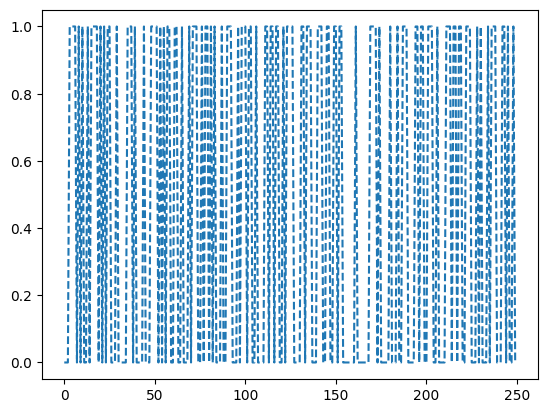

In [ ]:
list1=y_df_test.tolist()
plt.plot(list1,linestyle = '--')
plt.show()

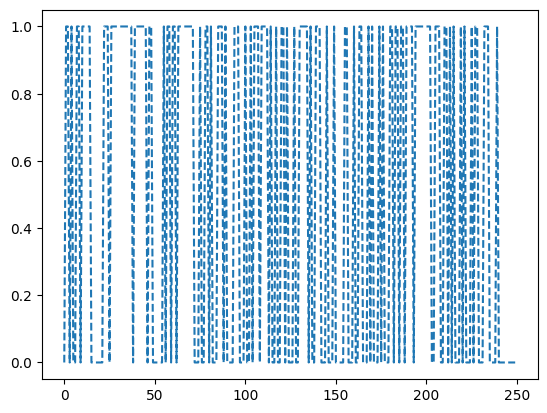

In [ ]:
list2=y_fit_LR.tolist()
plt.plot(list2,linestyle = '--')
plt.show()

In [ ]:
# print(y_df_test)
type(y_df_test)


numpy.ndarray

In [ ]:
y_df_test.shape

(250, 1)

In [ ]:
print(y_fit_LR)
print(type(y_fit_LR))


[0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
<class 'numpy.ndarray'>


In [ ]:
y_fit_LR.shape

(250,)

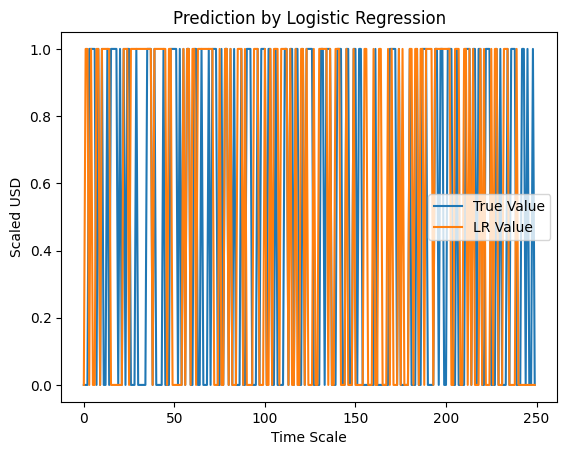

In [ ]:
#Predicted vs True Adj Close Value – LR



plt.plot(y_df_test, label='True Value')
plt.plot(y_fit_LR, label='LR Value')
plt.title('Prediction by Logistic Regression')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [ ]:
# Fit and report Logistic Regression
baseline_LR = LogisticRegression(C = 0.000001, tol=0.000000001, max_iter=1000)
baseline_LR.fit(file_train, y_df_train)
    # print('Coefficients: \n', baseline_LR.coef_)
print("training accracy: %.4f" % baseline_LR.score(file_train, y_df_train))
print("test accuracy: %.4f" % baseline_LR.score(file_test, y_df_test))
pred= baseline_LR.predict(file_train)
y_fit_LR = baseline_LR.predict(file_test)
print(type(y_fit_LR))
# print(y_fit_LR)
# print(y_df_test)
print('Accuracy:', accuracy_score(y_df_test, y_fit_LR))
print('ROC AUC Score:', roc_auc_score(y_df_test, y_fit_LR))
print('F1 score:', f1_score(y_df_test, y_fit_LR))
print()
print('\n clasification report training:\n', classification_report(y_df_train, pred))
print('\n confussion matrix:\n',confusion_matrix(y_df_train, pred))

print('\n clasification report testing:\n', classification_report(y_df_test, y_fit_LR))
print('\n confussion matrix:\n',confusion_matrix(y_df_test, y_fit_LR))

training accracy: 0.5622
test accuracy: 0.4640
<class 'numpy.ndarray'>
Accuracy: 0.464
ROC AUC Score: 0.5
F1 score: 0.6338797814207651


 clasification report training:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       317
         1.0       0.56      1.00      0.72       407

    accuracy                           0.56       724
   macro avg       0.28      0.50      0.36       724
weighted avg       0.32      0.56      0.40       724


 confussion matrix:
 [[  0 317]
 [  0 407]]

 clasification report testing:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       134
         1.0       0.46      1.00      0.63       116

    accuracy                           0.46       250
   macro avg       0.23      0.50      0.32       250
weighted avg       0.22      0.46      0.29       250


 confussion matrix:
 [[  0 134]
 [  0 116]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precisio

In [ ]:
from sklearn import svm

In [ ]:
# Fit and report SVM
    # c = 0.5
svm_rbf = svm.SVC(C=0.5, kernel='rbf',max_iter=50000)
svm_rbf.fit(file_train, y_df_train)
# Training acc
pred = svm_rbf.predict(file_train)
accuracy = accuracy_score(pred, y_df_train)
print('The training accuracy of the SVM is ', accuracy)
# Test acc
y_hat = svm_rbf.predict(file_test)
test_accuracy = accuracy_score(y_hat, y_df_test)
print('The test accuracy of the SVM is ', test_accuracy)
# Conf matrix
print('\n Training classification report:\n', classification_report(y_df_train, pred))
print('\n confusion matrix:\n',confusion_matrix(y_df_train, pred))
print('\n Test classification report:\n', classification_report(y_df_test, y_hat))
print('\n confusion matrix:\n',confusion_matrix(y_df_test, y_hat))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The training accuracy of the SVM is  0.5704419889502762
The test accuracy of the SVM is  0.46

 Training classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.02      0.04       317
         1.0       0.57      1.00      0.72       407

    accuracy                           0.57       724
   macro avg       0.78      0.51      0.38       724
weighted avg       0.76      0.57      0.42       724


 confusion matrix:
 [[  6 311]
 [  0 407]]

 Test classification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       134
         1.0       0.46      0.99      0.63       116

    accuracy                           0.46       250
   macro avg       0.23      0.50      0.32       250
weighted avg       0.21      0.46      0.29       250


 confusion matrix:
 [[  0 134]
 [  1 115]]


In [ ]:
# Fit and report SVM
    # c = 1e10
svm_rbf = svm.SVC(C=1e10, kernel='rbf',max_iter=100000)
svm_rbf.fit(file_train, y_df_train)
# Training acc
pred = svm_rbf.predict(file_train)
accuracy = accuracy_score(pred, y_df_train)
print('The training accuracy of the SVM is ', accuracy)
# Test acc
y_hat = svm_rbf.predict(file_test)
test_accuracy = accuracy_score(y_hat, y_df_test)
print('The test accuracy of the SVM is ', test_accuracy)
# Conf matrix
print('\n Training classification report:\n', classification_report(y_df_train, pred))
print('\n confusion matrix:\n',confusion_matrix(y_df_train, pred))
print('\n Test classification report:\n', classification_report(y_df_test, y_hat))
print('\n confusion matrix:\n',confusion_matrix(y_df_test, y_hat))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The training accuracy of the SVM is  1.0
The test accuracy of the SVM is  0.5

 Training classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       317
         1.0       1.00      1.00      1.00       407

    accuracy                           1.00       724
   macro avg       1.00      1.00      1.00       724
weighted avg       1.00      1.00      1.00       724


 confusion matrix:
 [[317   0]
 [  0 407]]

 Test classification report:
               precision    recall  f1-score   support

         0.0       0.54      0.42      0.47       134
         1.0       0.47      0.59      0.52       116

    accuracy                           0.50       250
   macro avg       0.51      0.51      0.50       250
weighted avg       0.51      0.50      0.50       250


 confusion matrix:
 [[56 78]
 [47 69]]


In [ ]:
# Fit and report SVM
    # c = 1e1
svm_rbf = svm.SVC(C=10, kernel='rbf',max_iter=100000)
svm_rbf.fit(file_train, y_df_train)
# Training acc
pred = svm_rbf.predict(file_train)
accuracy = accuracy_score(pred, y_df_train)
print('The training accuracy of the SVM is ', accuracy)
# Test acc
y_hat = svm_rbf.predict(file_test)
test_accuracy = accuracy_score(y_hat, y_df_test)
print('The test accuracy of the SVM is ', test_accuracy)
# Conf matrix
print('\n Training classification report:\n', classification_report(y_df_train, pred))
print('\n confusion matrix:\n',confusion_matrix(y_df_train, pred))
print('\n Test classification report:\n', classification_report(y_df_test, y_hat))
print('\n confusion matrix:\n',confusion_matrix(y_df_test, y_hat))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The training accuracy of the SVM is  0.994475138121547
The test accuracy of the SVM is  0.5

 Training classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       317
         1.0       0.99      1.00      1.00       407

    accuracy                           0.99       724
   macro avg       0.99      0.99      0.99       724
weighted avg       0.99      0.99      0.99       724


 confusion matrix:
 [[314   3]
 [  1 406]]

 Test classification report:
               precision    recall  f1-score   support

         0.0       0.54      0.42      0.47       134
         1.0       0.47      0.59      0.52       116

    accuracy                           0.50       250
   macro avg       0.51      0.51      0.50       250
weighted avg       0.51      0.50      0.50       250


 confusion matrix:
 [[56 78]
 [47 69]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Fit Random Forest
rf = RandomForestClassifier(n_estimators=10, oob_score=True, random_state=0)
rf.fit(file_train, y_df_train)
# Training acc
pred = rf.predict(file_train)
accuracy = accuracy_score(pred, y_df_train)
print('The training accuracy of the Random Forest is ', accuracy)
# Test acc
y_hat = rf.predict(file_test)
test_accuracy = accuracy_score(y_hat, y_df_test)
print('The test accuracy of the Random Forest is ', test_accuracy)
# Conf matrix
print('\n Training clasification report:\n', classification_report(y_df_train, pred))
print('\n confusion matrix:\n',confusion_matrix(y_df_train, pred))
print('\n Test clasification report:\n', classification_report(y_df_test, y_hat))
print('\n confusion matrix:\n',confusion_matrix(y_df_test, y_hat))

The training accuracy of the Random Forest is  0.9903314917127072
The test accuracy of the Random Forest is  0.596

 Training clasification report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       317
         1.0       1.00      0.99      0.99       407

    accuracy                           0.99       724
   macro avg       0.99      0.99      0.99       724
weighted avg       0.99      0.99      0.99       724


 confusion matrix:
 [[316   1]
 [  6 401]]

 Test clasification report:
               precision    recall  f1-score   support

         0.0       0.63      0.58      0.61       134
         1.0       0.56      0.61      0.58       116

    accuracy                           0.60       250
   macro avg       0.60      0.60      0.60       250
weighted avg       0.60      0.60      0.60       250


 confusion matrix:
 [[78 56]
 [45 71]]


<ipython-input-224-30f767e98b6f>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(file_train, y_df_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


In [ ]:
# Fit Random Forest
rf = RandomForestClassifier(n_estimators=200, oob_score=True, random_state=0)
rf.fit(file_train, y_df_train)
# Training acc
pred = rf.predict(file_train)
accuracy = accuracy_score(pred, y_df_train)
print('The training accuracy of the Random Forest is ', accuracy)
# Test acc
y_hat = rf.predict(file_test)
test_accuracy = accuracy_score(y_hat, y_df_test)
print('The test accuracy of the Random Forest is ', test_accuracy)
# Conf matrix
print('\n Training clasification report:\n', classification_report(y_df_train, pred))
print('\n confusion matrix:\n',confusion_matrix(y_df_train, pred))
print('\n Test clasification report:\n', classification_report(y_df_test, y_hat))
print('\n confusion matrix:\n',confusion_matrix(y_df_test, y_hat))

<ipython-input-225-fd1c6d5dae19>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(file_train, y_df_train)


The training accuracy of the Random Forest is  1.0
The test accuracy of the Random Forest is  0.488

 Training clasification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       317
         1.0       1.00      1.00      1.00       407

    accuracy                           1.00       724
   macro avg       1.00      1.00      1.00       724
weighted avg       1.00      1.00      1.00       724


 confusion matrix:
 [[317   0]
 [  0 407]]

 Test clasification report:
               precision    recall  f1-score   support

         0.0       0.56      0.22      0.32       134
         1.0       0.47      0.79      0.59       116

    accuracy                           0.49       250
   macro avg       0.51      0.51      0.45       250
weighted avg       0.52      0.49      0.44       250


 confusion matrix:
 [[ 30 104]
 [ 24  92]]


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import RMSprop,Adam
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D

In [ ]:
m1, n1 = file_train.shape
x_train = np.array(file_train).reshape(m1, n1, 1)
m2, n2 = file_test.shape
x_test= np.array(file_test).reshape(m2, n2, 1)

In [ ]:
x_train.shape

(724, 87, 1)

In [ ]:
x_test.shape

(250, 87, 1)

In [ ]:
train_confusion = np.zeros((2, 2))
test_confusion = np.zeros((2, 2))

batch_size = 128
epochs = 80
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=x_train.shape[1:3]))

#model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(3))

#model.add(Conv1D(128, 3, activation='relu'))
model.add(Conv1D(128, 3, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
"""
#model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, input_shape=x_train.shape[1:3]))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
"""
model.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
print(x_train.shape)
# print(filename)
# if x_train.shape[0] == 0:
#     continue

# Train model
history = model.fit(x_train, y_df_train,batch_size=batch_size,   epochs=epochs,verbose=1)
                
             

# Training report
train_eval = model.evaluate(x_train, y_df_train, verbose=0)
print('Training loss:', train_eval[0])
print('Training accuracy of CNN:', train_eval[1])


pred = model.predict(x_train)
pred = (pred > 0.5)
train_conf = confusion_matrix(y_df_train, pred)
train_confusion += train_conf
print('\n Training clasification report:\n', classification_report(y_df_train, pred))
print(train_conf)




# Test report
test_eval = model.evaluate(x_test, y_df_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy of CNN:',test_eval[1])


y_hat = model.predict(x_test)
y_hat = (y_hat > 0.5)
test_conf = confusion_matrix(y_df_test, y_hat)
test_confusion += test_conf
print('\n Test clasification report:\n', classification_report(y_df_test, y_hat))
print(test_conf)
    

(724, 87, 1)
Epoch 1/80
6/6 [==============================] - 1s 26ms/step - loss: 0.6910 - accuracy: 0.5580
Epoch 2/80
6/6 [==============================] - 0s 30ms/step - loss: 0.6862 - accuracy: 0.5566
Epoch 3/80
6/6 [==============================] - 0s 26ms/step - loss: 0.6859 - accuracy: 0.5635
Epoch 4/80
6/6 [==============================] - 0s 27ms/step - loss: 0.6857 - accuracy: 0.5649
Epoch 5/80
6/6 [==============================] - 0s 25ms/step - loss: 0.6860 - accuracy: 0.5622
Epoch 6/80
6/6 [==============================] - 0s 26ms/step - loss: 0.6864 - accuracy: 0.5635
Epoch 7/80
6/6 [==============================] - 0s 26ms/step - loss: 0.6855 - accuracy: 0.5525
Epoch 8/80
6/6 [==============================] - 0s 25ms/step - loss: 0.6820 - accuracy: 0.5566
Epoch 9/80
6/6 [==============================] - 0s 27ms/step - loss: 0.6834 - accuracy: 0.5622
Epoch 10/80
6/6 [==============================] - 0s 27ms/step - loss: 0.6846 - accuracy: 0.5622
Epoch 11/80
6/6 

In [ ]:
# train_confusion = np.zeros((2, 2))
# test_confusion = np.zeros((2, 2))

batch_size = 32
epochs = 200
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=x_train.shape[1:3]))

#model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(3))

model.add(Conv1D(128, 3, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
"""
#model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, input_shape=x_train.shape[1:3]))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
"""
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
print(x_train.shape)


# Train model
history = model.fit(x_train, y_df_train,batch_size=batch_size,   epochs=epochs,verbose=1)
                
             
# Training report
train_eval = model.evaluate(x_train, y_df_train, verbose=0)
print('Training loss:', train_eval[0])
print('Training accuracy of CNN:', train_eval[1])


pred = model.predict(x_train)
pred = (pred > 0.5)
train_conf = confusion_matrix(y_df_train, pred)
train_confusion += train_conf
print('\n Training clasification report:\n', classification_report(y_df_train, pred))
print(train_conf)




# Test report
test_eval = model.evaluate(x_test, y_df_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy of CNN:',test_eval[1])


y_hat = model.predict(x_test)
y_hat = (y_hat > 0.5)
test_conf = confusion_matrix(y_df_test, y_hat)
test_confusion += test_conf
print('\n Test clasification report:\n', classification_report(y_df_test, y_hat))
print(test_conf)
    

(724, 87, 1)
Epoch 1/200
23/23 [==============================] - 1s 10ms/step - loss: 0.6898 - accuracy: 0.5552
Epoch 2/200
23/23 [==============================] - 0s 10ms/step - loss: 0.6870 - accuracy: 0.5622
Epoch 3/200
23/23 [==============================] - 0s 9ms/step - loss: 0.6854 - accuracy: 0.5663
Epoch 4/200
23/23 [==============================] - 0s 10ms/step - loss: 0.6855 - accuracy: 0.5622
Epoch 5/200
23/23 [==============================] - 0s 10ms/step - loss: 0.6849 - accuracy: 0.5635
Epoch 6/200
23/23 [==============================] - 0s 9ms/step - loss: 0.6844 - accuracy: 0.5622
Epoch 7/200
23/23 [==============================] - 0s 10ms/step - loss: 0.6826 - accuracy: 0.5622
Epoch 8/200
23/23 [==============================] - 0s 9ms/step - loss: 0.6839 - accuracy: 0.5649
Epoch 9/200
23/23 [==============================] - 0s 10ms/step - loss: 0.6836 - accuracy: 0.5635
Epoch 10/200
23/23 [==============================] - 0s 10ms/step - loss: 0.6826 - accura

In [ ]:
# train_confusion = np.zeros((2, 2))
# test_confusion = np.zeros((2, 2))

# batch_size = 16
# epochs = 500
# model = Sequential()
# model.add(Conv1D(64, 3, activation='relu', input_shape=x_train.shape[1:3]))

# #model.add(Conv1D(128, 3, activation='relu'))
# model.add(MaxPooling1D(3))

# #model.add(Conv1D(128, 3, activation='relu'))
# model.add(Conv1D(128, 3, activation='relu'))
# model.add(GlobalAveragePooling1D())
# model.add(Dropout(0.4))
# model.add(Dense(1, activation='sigmoid'))
# """
# #model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, input_shape=x_train.shape[1:3]))
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='sigmoid'))
# """
# model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
# print(x_train.shape)


# # Train model
# history = model.fit(x_train, y_df_train,batch_size=batch_size,   epochs=epochs,verbose=1)
                


batch_size = 64
epochs = 200
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=x_train.shape[1:3]))

model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(3))

# model.add(Conv1D(256, 3, activation='relu'))
# model.add(MaxPooling1D(3))

model.add(Conv1D(512, 3, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.9))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.9))

model.add(Dense(1, activation='relu'))

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
# print(x_train.shape)

# Train model
history = model.fit(x_train, y_df_train,batch_size=batch_size, epochs=epochs,verbose=1)


    # Training report
train_eval = model.evaluate(x_train, y_df_train, verbose=0)
print('Training loss:', train_eval[0])
print('Training accuracy of CNN:', train_eval[1])


pred = model.predict(x_train)
pred = (pred > 0.5)
train_conf = confusion_matrix(y_df_train, pred)
train_confusion += train_conf
print('\n Training clasification report:\n', classification_report(y_df_train, pred))
print(train_conf)




# Test report
test_eval = model.evaluate(x_test, y_df_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy of CNN:',test_eval[1])


y_hat = model.predict(x_test)
y_hat = (y_hat > 0.5)
test_conf = confusion_matrix(y_df_test, y_hat)
test_confusion += test_conf
print('\n Test clasification report:\n', classification_report(y_df_test, y_hat))
print(test_conf)
    

Epoch 1/200
12/12 [==============================] - 2s 90ms/step - loss: 4.2510 - accuracy: 0.4599
Epoch 2/200
12/12 [==============================] - 1s 91ms/step - loss: 4.3977 - accuracy: 0.5083
Epoch 3/200
12/12 [==============================] - 1s 91ms/step - loss: 5.2488 - accuracy: 0.4572
Epoch 4/200
12/12 [==============================] - 1s 111ms/step - loss: 4.8313 - accuracy: 0.5110
Epoch 5/200
12/12 [==============================] - 2s 155ms/step - loss: 4.4151 - accuracy: 0.4972
Epoch 6/200
12/12 [==============================] - 1s 116ms/step - loss: 4.5648 - accuracy: 0.4903
Epoch 7/200
12/12 [==============================] - 1s 89ms/step - loss: 3.7762 - accuracy: 0.4724
Epoch 8/200
12/12 [==============================] - 1s 89ms/step - loss: 3.1715 - accuracy: 0.4738
Epoch 9/200
12/12 [==============================] - 1s 88ms/step - loss: 1.9411 - accuracy: 0.4448
Epoch 10/200
12/12 [==============================] - 1s 90ms/step - loss: 1.5956 - accuracy: 0.4

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


8/8 [==============================] - 0s 13ms/step

 Test clasification report:
               precision    recall  f1-score   support

         0.0       0.54      1.00      0.70       134
         1.0       0.00      0.00      0.00       116

    accuracy                           0.54       250
   macro avg       0.27      0.50      0.35       250
weighted avg       0.29      0.54      0.37       250

[[134   0]
 [116   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [ ]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=250, learning_rate=1)# 200 0.01
                        
# Train Adaboost Classifer
model = abc.fit(file_train, y_df_train)

pred = model.predict(file_train)

#Predict the response for test dataset
y_pred = model.predict(file_test)

# Model Accuracy, how often is the classifier correct?
print("Training Accuracy:",metrics.accuracy_score(y_df_train, pred))
print("Testing Accuracy:",metrics.accuracy_score(y_df_test, y_pred))


print('\n Training clasification report:\n', classification_report(y_df_train, pred))
print('\n confusion matrix:\n',confusion_matrix(y_df_train, pred))
print('\n Test clasification report:\n', classification_report(y_df_test, y_pred))
print('\n confusion matrix:\n',confusion_matrix(y_df_test, y_pred))




/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy: 0.994475138121547
Testing Accuracy: 0.444

 Training clasification report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       317
         1.0       0.99      1.00      1.00       407

    accuracy                           0.99       724
   macro avg       0.99      0.99      0.99       724
weighted avg       0.99      0.99      0.99       724


 confusion matrix:
 [[314   3]
 [  1 406]]

 Test clasification report:
               precision    recall  f1-score   support

         0.0       0.46      0.22      0.30       134
         1.0       0.44      0.70      0.54       116

    accuracy                           0.44       250
   macro avg       0.45      0.46      0.42       250
weighted avg       0.45      0.44      0.41       250


 confusion matrix:
 [[ 30 104]
 [ 35  81]]


In [ ]:
# Load libraries


# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation

svc=SVC(probability=True, kernel='rbf')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=250, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(file_train, y_df_train)

pred = model.predict(file_train)

#Predict the response for test dataset
y_pred = model.predict(file_test)


# Model Accuracy, how often is the classifier correct?
print("Training Accuracy:",metrics.accuracy_score(y_df_train, pred))

print("Testing Accuracy:",metrics.accuracy_score(y_df_test, y_pred))




print('\n Training clasification report:\n', classification_report(y_df_train, pred))
print('\n confusion matrix:\n',confusion_matrix(y_df_train, pred))
print('\n Test clasification report:\n', classification_report(y_df_test, y_pred))
print('\n confusion matrix:\n',confusion_matrix(y_df_test, y_pred))



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training Accuracy: 0.5621546961325967
Testing Accuracy: 0.464

 Training clasification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       317
         1.0       0.56      1.00      0.72       407

    accuracy                           0.56       724
   macro avg       0.28      0.50      0.36       724
weighted avg       0.32      0.56      0.40       724


 confusion matrix:
 [[  0 317]
 [  0 407]]

 Test clasification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       134
         1.0       0.46      1.00      0.63       116

    accuracy                           0.46       250
   macro avg       0.23      0.50      0.32       250
weighted avg       0.22      0.46      0.29       250


 confusion matrix:
 [[  0 134]
 [  0 116]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif